Final Version

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Function to perform chi-square:
def chi_test_contigency_table(contigency_table):
    """
 Function to run chi-square test from a contingency table

Parameters:
contingency_table: DataFrame
Expected contingency table

Returns:
Chi-square statistic
p-value
Degrees of freedom
Expected contingency table
    """
    try:
        # Execute test
        chi2, p_value, gl, expected_table = chi2_contingency(contigency_table)
        print("Qui2 Value:", chi2)
        print("P value:", p_value)
        print("Degrees of fredom:", gl)
        print("Expected contigency table:")
        print(pd.DataFrame(expected_table).round(2))
        print(expected_table)

        # P value analysis
        alpha = 0.05 # Significance level
        if p_value < alpha:
            print("Reject null hypothesis")
        else:
            print("Accept null hypothesis")
    except ValueError as ve:
        print("Error to execute chi test:", ve)


## Data Processing from file

In [ ]:
import pandas as pd
df = pd.read_csv("Data_project_chi.txt", sep =" ", skiprows=1, header=None)

df.columns = ["index", "ID", "Race", "Sex", "Age", "Tobacoo", "Weight", "Height", "BMI", "Financial_status","Circumference", "IQ", "Treatment"]

display (df)

,index,ID,Race,Sex,Age,Tobacoo,Weight,Height,BMI,Financial_status,Circumference,IQ,Treatment
0,1,10,White,Female,79,No,51,1.65,18.732782,B,19.366511,91.123573,Before
1,2,59,White,Female,77,No,59,1.72,19.943213,B,21.396404,88.808316,After
2,3,54,White,Female,53,No,55,1.63,20.700817,B,16.702539,86.966494,Before
3,4,55,White,Female,53,No,70,1.83,20.902386,B,12.117289,82.179061,After
4,5,9,White,Female,57,Yes,101,1.90,27.977839,B,19.340519,76.599817,Before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1,White,Male,57,Yes,84,1.66,30.483379,A,23.848106,111.146564,After
86,87,27,White,Female,72,Yes,103,1.81,31.439822,A,20.174692,89.448826,Before
87,88,35,White,Female,71,No,69,1.47,31.931140,A,20.123768,64.392605,After
88,89,79,White,Female,53,Yes,103,1.79,32.146313,A,14.136160,85.163797,Before


#Is there any association between tobacoo use and financial status?

In [ ]:

contigency_table = pd.crosstab(df["Financial_status"], df["Tobacoo"])

chi_test_contigency_table(contigency_table)

Qui2 Value: 0.9679111211369277
P value: 0.616340591129207
Degrees of fredom: 2
Expected contigency table:
       0      1
0  17.33   8.67
1  20.67  10.33
2  22.00  11.00
[[17.33333333  8.66666667]
 [20.66666667 10.33333333]
 [22.         11.        ]]
Accept null hypothesis


##Is there any association between tobaccoo use and sex gender?

In [ ]:
contigency_table = pd.crosstab (df["Sex"], df ["Tobacoo"])

chi_test_contigency_table(contigency_table)

Qui2 Value: 7.2023809523809526
P value: 0.007280692242297982
Degrees of fredom: 1
Expected contigency table:
      0     1
0  42.0  21.0
1  18.0   9.0
[[42. 21.]
 [18.  9.]]
Reject null hypothesis


In [ ]:
df.describe(). round(2)

,index,ID,Age,Weight,Height,BMI,Circumference,IQ
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,45.50,45.50,64.91,86.06,1.63,33.03,19.72,83.07
std,26.12,26.12,9.41,18.13,0.19,7.72,3.50,15.88
min,1.00,1.00,50.00,51.00,1.20,15.79,8.41,37.52
25%,23.25,23.25,56.00,71.00,1.50,27.17,17.40,74.41
50%,45.50,45.50,65.50,88.00,1.65,32.04,20.15,83.38
75%,67.75,67.75,73.00,97.00,1.79,38.53,22.30,92.58
max,90.00,90.00,80.00,140.00,1.96,47.89,28.15,128.71


In [ ]:
# Counting the number of smokers and non-smokers by sex
contingency_table = pd.crosstab(df["Sex"], df["Tobacoo"])

print("Contingency Table of Tobacco Use by Sex:")
print(contingency_table)


Contingency Table of Tobacco Use by Sex:
Tobacoo  No  Yes
Sex             
Female   48   15
Male     12   15


### Data visualization

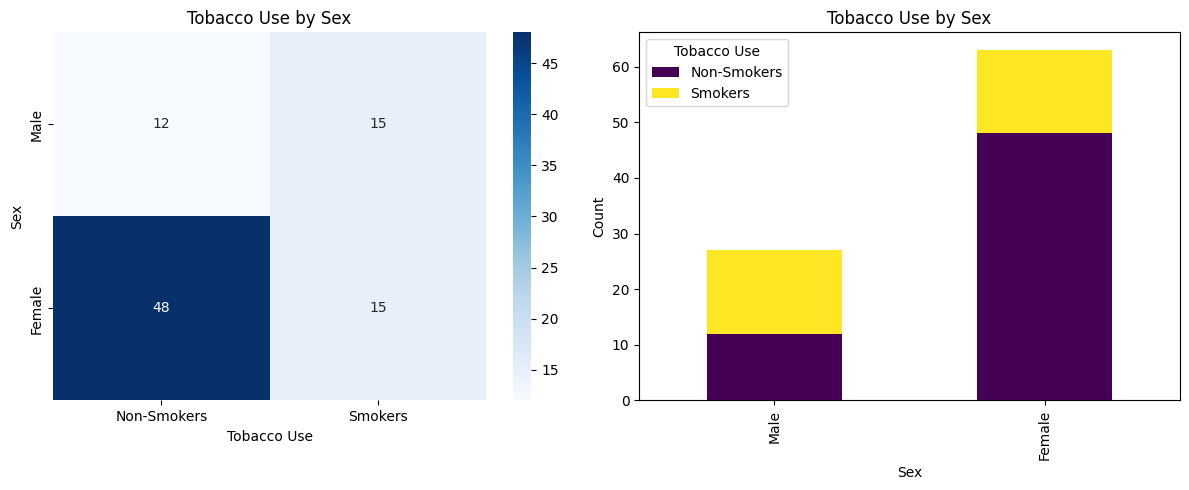

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.DataFrame({
    "Non-Smokers": [12, 48],
    "Smokers": [15, 15]
}, index=["Male", "Female"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap to visualize the contingency table
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt=".0f", ax=axes[0])
axes[0].set_title("Tobacco Use by Sex")
axes[0].set_xlabel("Tobacco Use")
axes[0].set_ylabel("Sex")

# Bar chart to compare smoking prevalence by sex
contingency_table.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])
axes[1].set_title("Tobacco Use by Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")
axes[1].legend(title="Tobacco Use")

# Show both plots
plt.tight_layout()
plt.show()
